# #Field Factory

In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
import rspie as rs
from matplotlib import pyplot as plt
import cmasher as cm
import os

In [26]:
# xmin, xmax = -2.5, 2.5
# ymin, ymax = -5  , 5
# simulation_resolution = 0.1
# wavelength = 0.6
# sampling_resolution = simulation_resolution / 2
# num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
# num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
# x = np.linspace(xmin, xmax, num_elements_x)
# y = np.linspace(ymin, ymax, num_elements_y)
# xg, yg = np.meshgrid(x, y)
# field  = 1/(xg**2 + yg**2 + 1)
# header = '''/rn,a,b/nx0/ls1
# /r,qa,qb
# {num_elements_x} {xmin} {xmax} 0 OUTPUT_AMPLITUDE_3D Wavelength={wavelength}
# {num_elements_y} {ymin} {ymax}'''.format(num_elements_x=num_elements_x, num_elements_y=num_elements_y, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, wavelength=wavelength)

In [27]:
# rs.save_2D_array_to_dat('D:/Zia_Lab/Codebase/rspie/dummy_file.dat', 
#                         field, wavelength, xmin, xmax, ymin, ymax)

## ##Edge problems

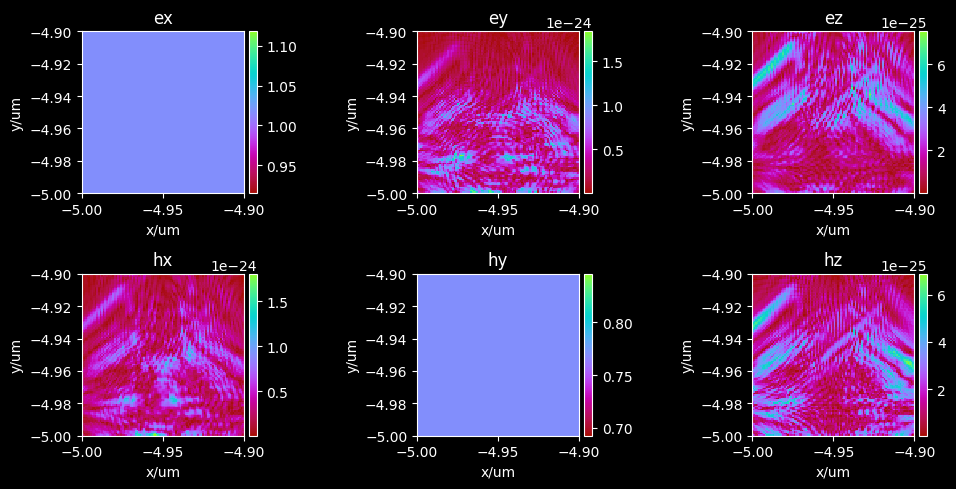

In [420]:
standard_in = {}
for fieldname in 'ex ey ez hx hy hz'.split(' '):
    fname = 'D:/Zia_Lab/Codebase/rspie/standard_in_m2_f2_%s.dat' % fieldname
    standard_in[fieldname] = rs.load_2d_dat(fname)
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    iplot = ax.imshow(np.abs(field[3]), cmap=cm.neon, extent=extent,
                      origin='lower', interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname)
plt.tight_layout()
plt.show()

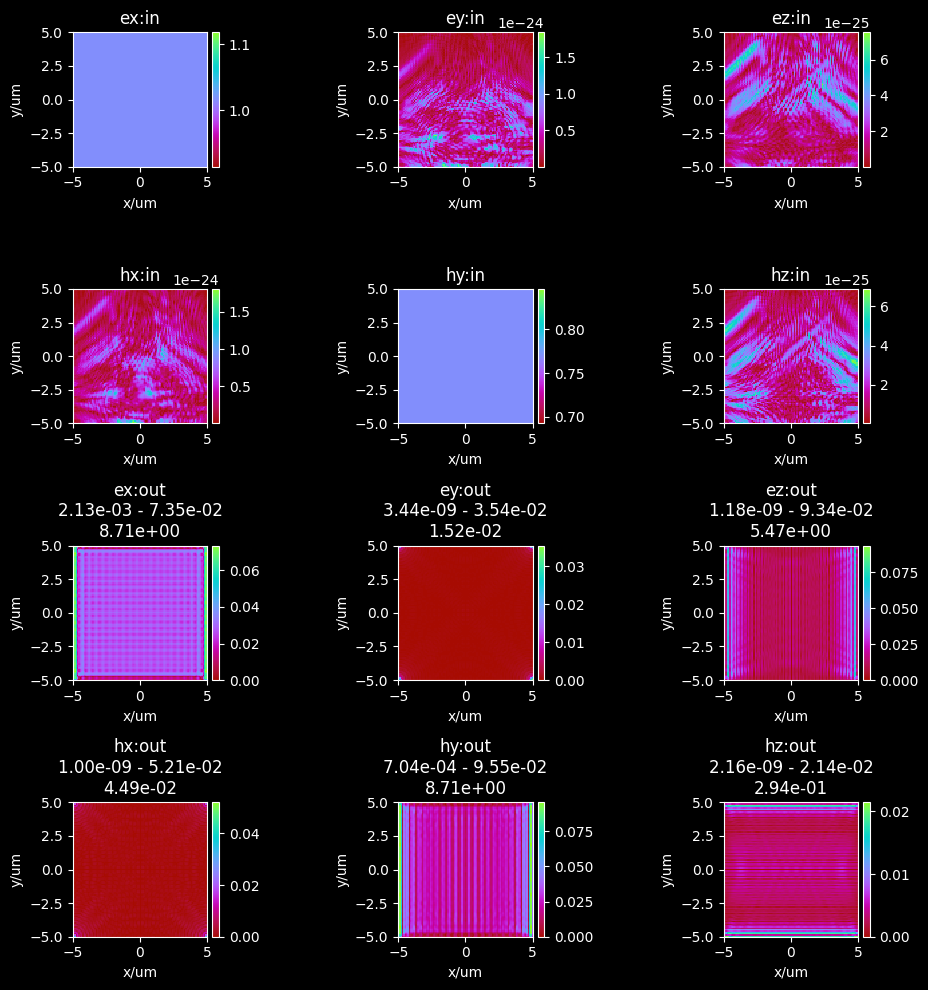

In [437]:
standard_out = {}
for fieldname in 'ex ey ez hx hy hz'.split(' '):
    fname = 'D:/Zia_Lab/Codebase/rspie/standard_out_m2_f2_%s.dat' % fieldname
    standard_out[fieldname] = rs.load_2d_dat(fname)
fig, axes = plt.subplots(figsize=(10,10), nrows=4, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    iplot = ax.imshow(np.abs(field[3]), cmap=cm.neon, extent=extent,
                      origin='lower', interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname + ':in')
powers = {}
for idx, (fieldname, field) in enumerate(standard_out.items()):
    idx = idx+6
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    plotfield = np.abs(field[3])
    out_power = np.sum(plotfield**2)
    powers[fieldname] = out_power
    min, max = np.min(plotfield), np.max(plotfield)
    minmax = '%1.2e - %1.2e' % (min, max)
    iplot = ax.imshow(plotfield, cmap=cm.neon, 
                    extent=extent, origin='lower', 
                    vmin=0,
                    interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname + ':out\n' + minmax + '\n' + ('%1.2e' % out_power))
plt.tight_layout()
plt.show()

In [439]:
allpow = np.sum(np.array(list(powers.values())))
for k,v in powers.items():
    print(k,'%.5f %%' % (v/allpow*100))

ex 37.46145 %
ey 0.06548 %
ez 23.53146 %
hx 0.19341 %
hy 37.48364 %
hz 1.26456 %


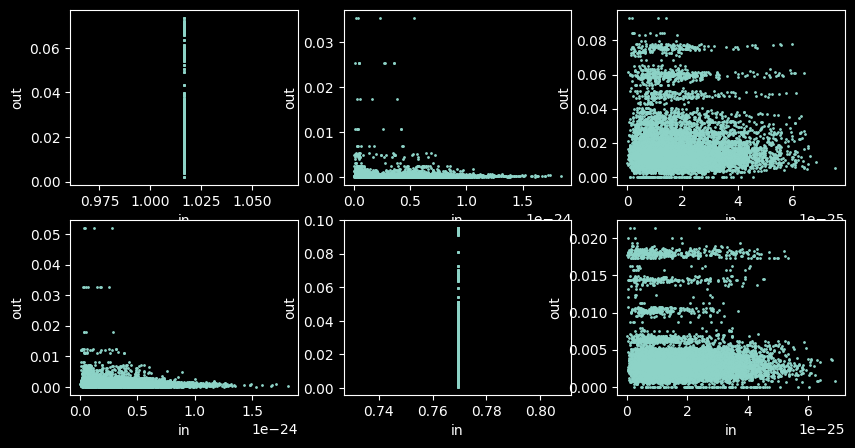

In [438]:
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    x = np.abs(field[3]).flatten()
    y = np.abs(standard_out[fieldname][3]).flatten()
    ax.plot(x,y,'o',ms=1)
    ax.set_xlabel('in')
    ax.set_ylabel('out')
plt.show()

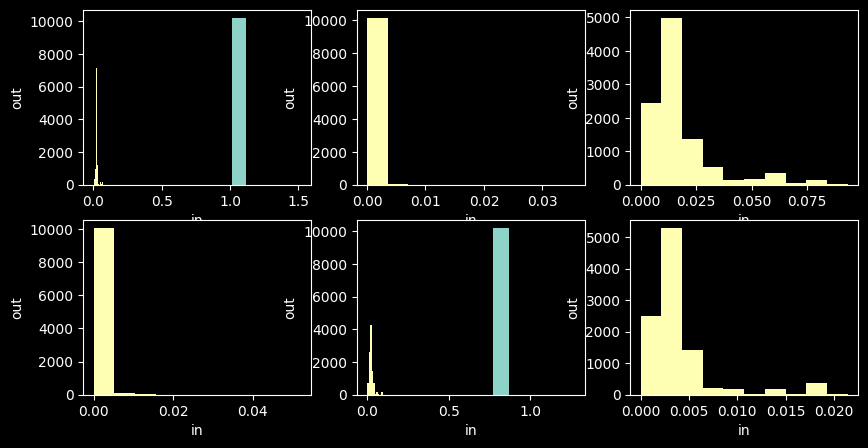

In [440]:
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    x = np.abs(field[3]).flatten()
    y = np.abs(standard_out[fieldname][3]).flatten()
    ax.hist(x)
    ax.hist(y)
    ax.set_xlabel('in')
    ax.set_ylabel('out')
plt.show()

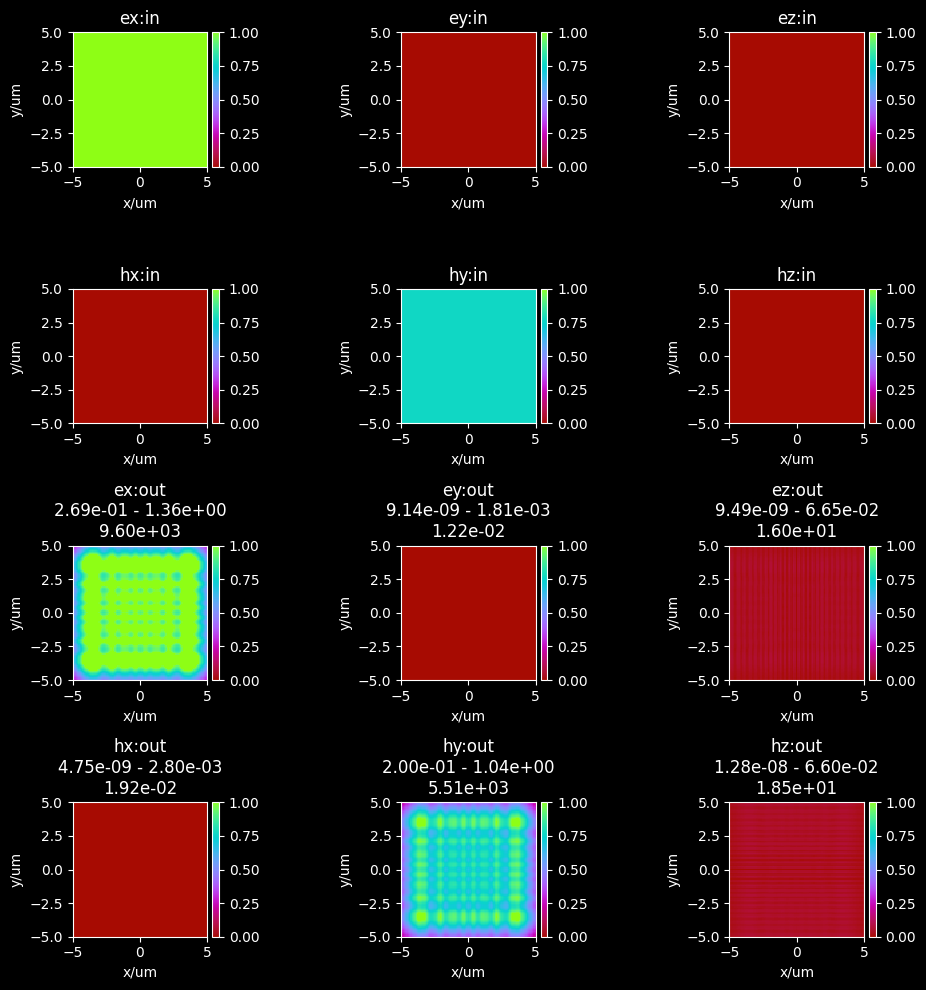

In [448]:
standard_out = {}
for fieldname in 'ex ey ez hx hy hz'.split(' '):
    fname = 'D:/Zia_Lab/Codebase/rspie/standard_out2_m2_f2_%s.dat' % fieldname
    standard_out[fieldname] = rs.load_2d_dat(fname)
fig, axes = plt.subplots(figsize=(10,10), nrows=4, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    iplot = ax.imshow(np.abs(field[3]), cmap=cm.neon, extent=extent,vmin=0,vmax=1,
                      origin='lower', interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname + ':in')
powers = {}
for idx, (fieldname, field) in enumerate(standard_out.items()):
    idx = idx+6
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    plotfield = np.abs(field[3])
    out_power = np.sum(plotfield**2)
    powers[fieldname] = out_power
    min, max = np.min(plotfield), np.max(plotfield)
    minmax = '%1.2e - %1.2e' % (min, max)
    iplot = ax.imshow(plotfield, cmap=cm.neon, 
                    extent=extent, origin='lower', 
                    vmin=0,
                    vmax=1,
                    interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname + ':out\n' + minmax + '\n' + ('%1.2e' % out_power))
plt.tight_layout()
plt.show()

In [432]:
allpow = np.sum(np.array(list(powers.values())))
for k,v in powers.items():
    print(k,'%.5f %%' % (v/allpow*100))

ex 63.36595 %
ey 0.00008 %
ez 0.10543 %
hx 0.00013 %
hy 36.40624 %
hz 0.12218 %


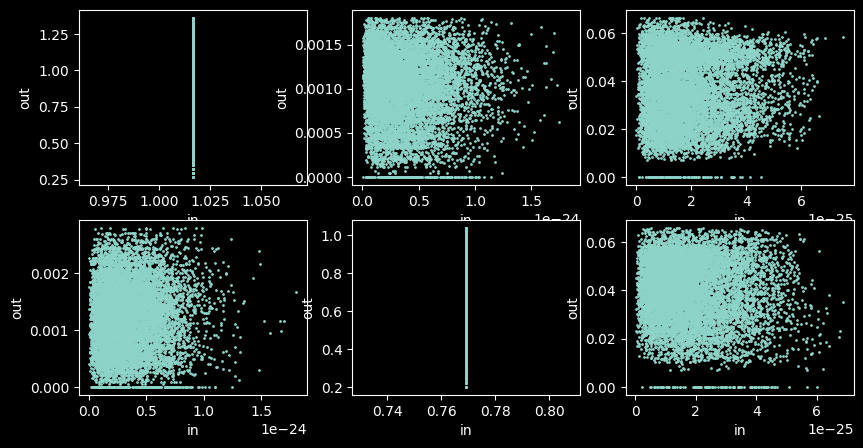

In [433]:
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    x = np.abs(field[3]).flatten()
    y = np.abs(standard_out[fieldname][3]).flatten()
    ax.plot(x,y,'o',ms=1)
    ax.set_xlabel('in')
    ax.set_ylabel('out')
plt.show()

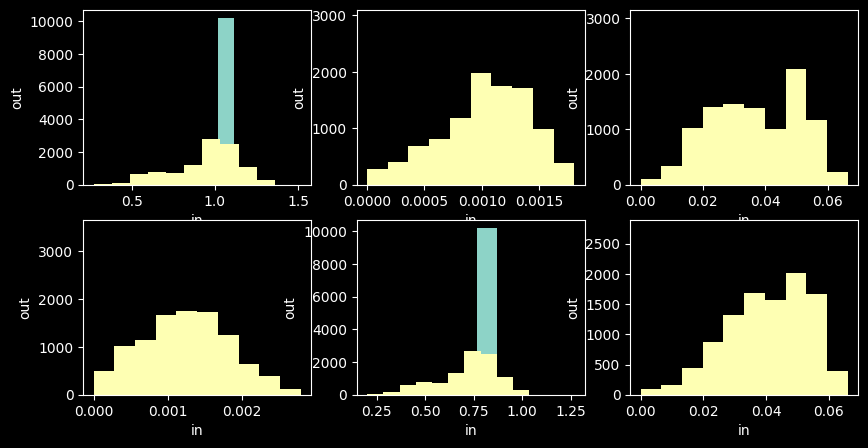

In [436]:
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    x = np.abs(field[3]).flatten()
    y = np.abs(standard_out[fieldname][3]).flatten()
    ax.hist(x)
    ax.hist(y)
    ax.set_xlabel('in')
    ax.set_ylabel('out')
plt.show()

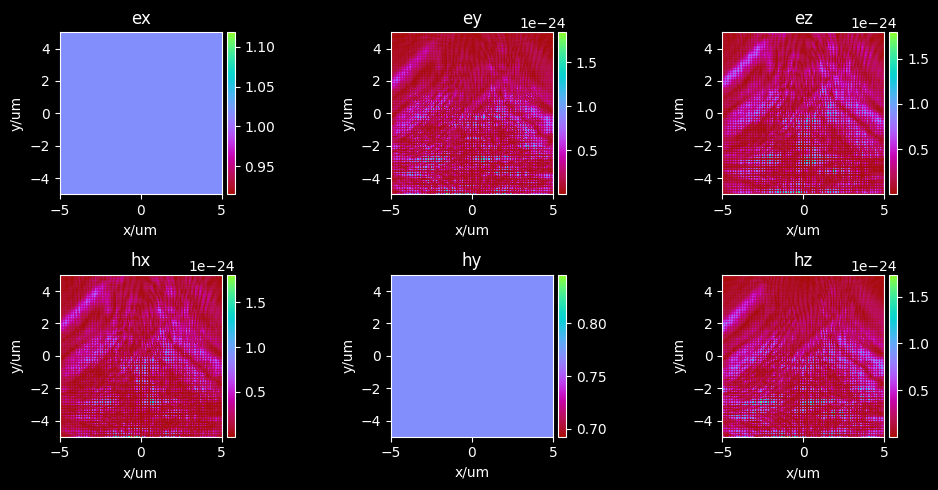

In [442]:
standard_in = {}
for fieldname in 'ex ey ez hx hy hz'.split(' '):
    fname = 'D:/Zia_Lab/Codebase/rspie/standard_in2_m2_f2_%s.dat' % fieldname
    standard_in[fieldname] = rs.load_2d_dat(fname)
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    iplot = ax.imshow(np.abs(field[3]), cmap=cm.neon, extent=extent,
                      origin='lower', interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname)
plt.tight_layout()
plt.show()

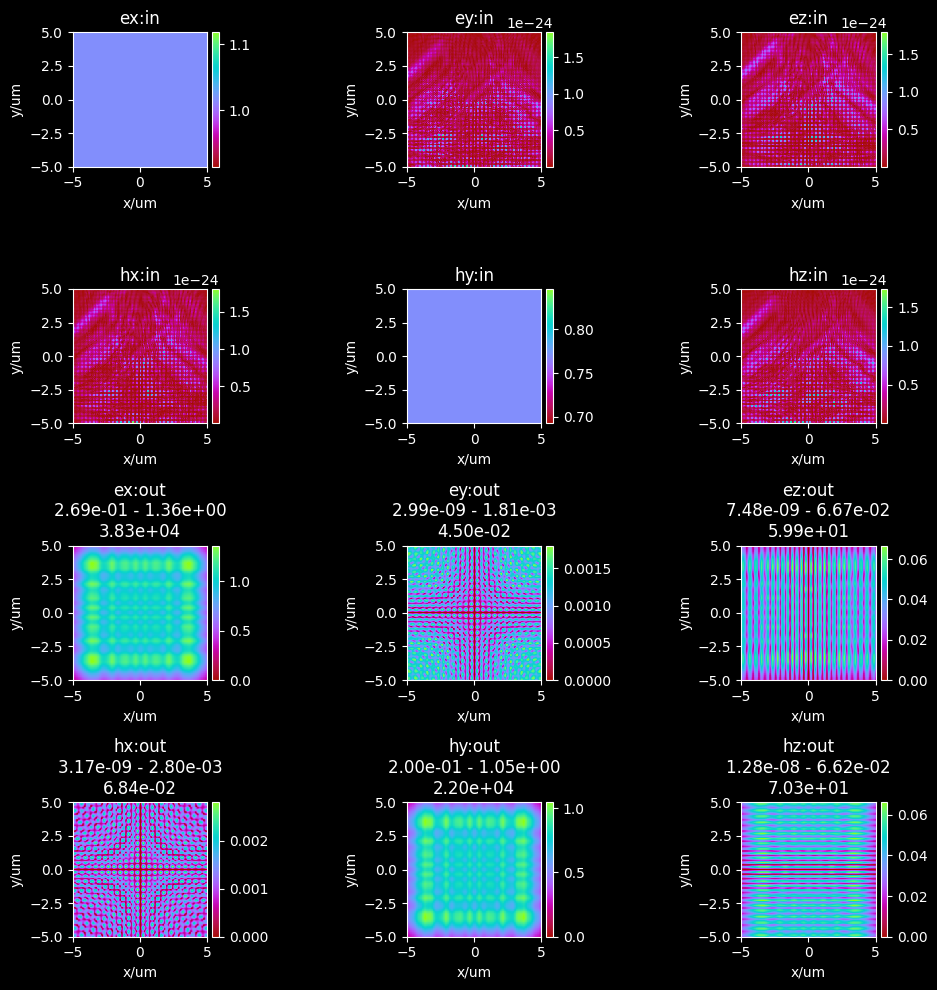

In [443]:
standard_out = {}
for fieldname in 'ex ey ez hx hy hz'.split(' '):
    fname = 'D:/Zia_Lab/Codebase/rspie/standard_out3_m2_f2_%s.dat' % fieldname
    standard_out[fieldname] = rs.load_2d_dat(fname)
fig, axes = plt.subplots(figsize=(10,10), nrows=4, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    iplot = ax.imshow(np.abs(field[3]), cmap=cm.neon, extent=extent,
                      origin='lower', interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname + ':in')
powers = {}
for idx, (fieldname, field) in enumerate(standard_out.items()):
    idx = idx+6
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[-1], yrange[0], yrange[-1]]
    plotfield = np.abs(field[3])
    out_power = np.sum(plotfield**2)
    powers[fieldname] = out_power
    min, max = np.min(plotfield), np.max(plotfield)
    minmax = '%1.2e - %1.2e' % (min, max)
    iplot = ax.imshow(plotfield, cmap=cm.neon, 
                    extent=extent, origin='lower', 
                    vmin=0,
                    interpolation='none')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    ax.set_xlabel('x/um')
    ax.set_ylabel('y/um')
    fig.colorbar(iplot, cax=cax)
    ax.set_title(fieldname + ':out\n' + minmax + '\n' + ('%1.2e' % out_power))
plt.tight_layout()
plt.show()

In [444]:
allpow = np.sum(np.array(list(powers.values())))
for k,v in powers.items():
    print(k,'%.5f %%' % (v/allpow*100))

ex 63.36965 %
ey 0.00007 %
ez 0.09897 %
hx 0.00011 %
hy 36.41498 %
hz 0.11621 %


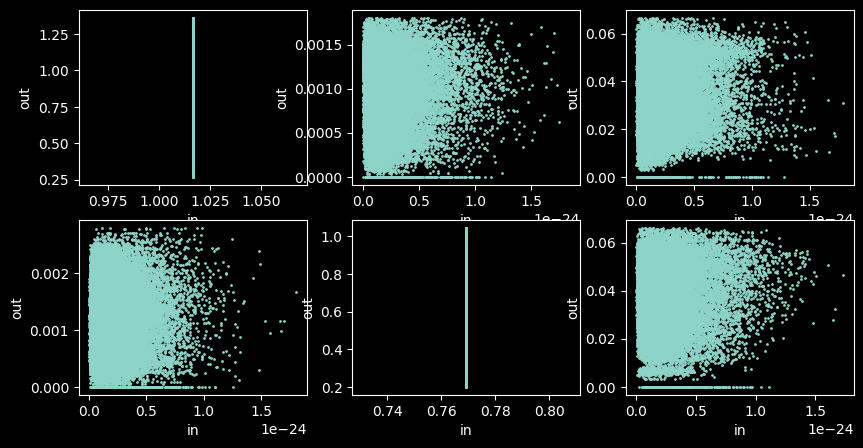

In [445]:
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    x = np.abs(field[3]).flatten()
    y = np.abs(standard_out[fieldname][3]).flatten()
    ax.plot(x,y,'o',ms=1)
    ax.set_xlabel('in')
    ax.set_ylabel('out')
plt.show()

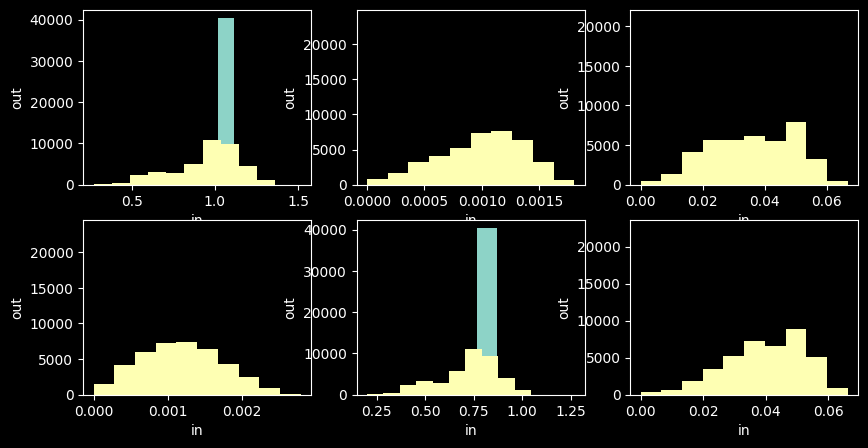

In [446]:
fig, axes = plt.subplots(figsize=(10,5), nrows=2, ncols=3)
axes = axes.flatten()
for idx, (fieldname, field) in enumerate(standard_in.items()):
    ax = axes[idx]
    xrange = field[1]
    yrange = field[2]
    extent = [xrange[0], xrange[1], yrange[0], yrange[1]]
    x = np.abs(field[3]).flatten()
    y = np.abs(standard_out[fieldname][3]).flatten()
    ax.hist(x)
    ax.hist(y)
    ax.set_xlabel('in')
    ax.set_ylabel('out')
plt.show()

## ##Importing - exporting complex fields

In [335]:
Lwidth = 10
xmin, xmax = -Lwidth/2, Lwidth/2
ymin, ymax = -Lwidth/2, Lwidth/2
simulation_resolution = 0.1
wavelength = 0.5
sampling_resolution = simulation_resolution / 2
num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
x = np.linspace(xmin, xmax, num_elements_x)
y = np.linspace(ymin, ymax, num_elements_y)
xg, yg = np.meshgrid(x, y)
xd, yd, zd = 0, 0, -Lwidth*21.
omega = 2*np.pi/wavelength
theta, phi = 0., 0.
field  = rs.dipole_field(xg, yg, 0, xd, yd, zd, theta, phi, omega)

In [336]:
fname = 'D:/Zia_Lab/Codebase/rspie/dummy_file.dat'
rs.save_2D_array_to_dat(fname, field[0], wavelength, xmin, xmax, ymin, ymax)


## ##Dipole fields

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

### ###z-dipole

In [247]:
Lwidth = 40
xmin, xmax = -Lwidth/2, Lwidth/2
ymin, ymax = -Lwidth/2, Lwidth/2
simulation_resolution = 0.1
wavelength = 0.5
sampling_resolution = simulation_resolution / 2
num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
x = np.linspace(xmin, xmax, num_elements_x)
y = np.linspace(ymin, ymax, num_elements_y)
xg, yg = np.meshgrid(x, y)
xd, yd, zd = 0, 0, -Lwidth*21.
omega = 2*np.pi/wavelength
theta, phi = 0., 0.
field  = rs.dipole_field(xg, yg, 0, xd, yd, zd, theta, phi, omega)

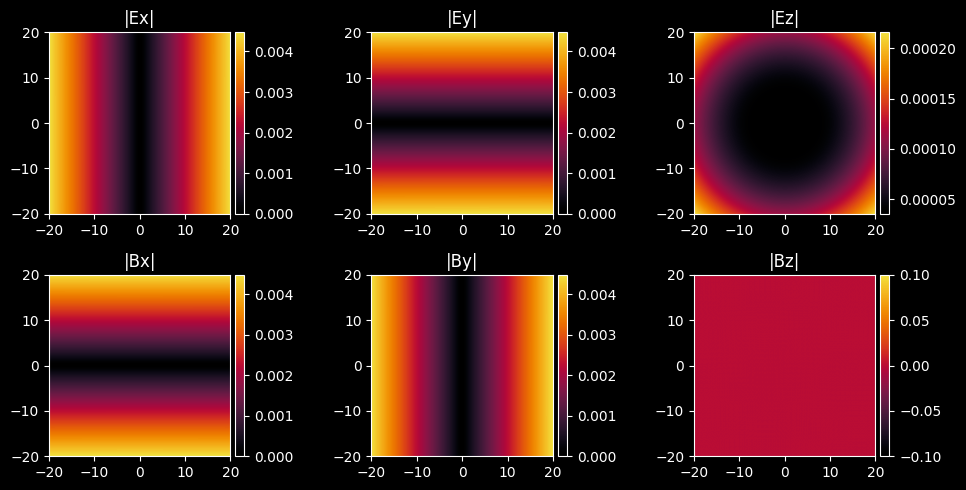

In [249]:
field_names = ['|Ex|','|Ey|','|Ez|','|Bx|','|By|','|Bz|']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
for i in range(6):
    ax = axes[i//3, i%3]
    iplot = ax.imshow(np.abs(field[i]),
            cmap=cm.ember,
            extent=[xmin, xmax, ymin, ymax], 
            origin='lower')
    ax.set_title(field_names[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(iplot, cax=cax)
plt.tight_layout()
plt.show()

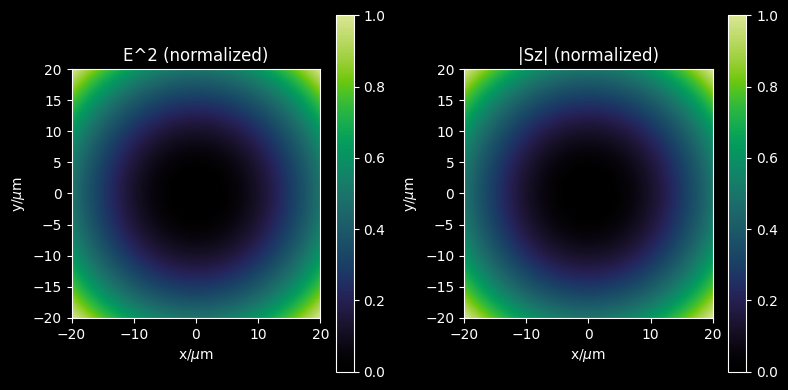

In [251]:
e_density = np.abs(field[0]**2 + field[1]**2 + field[2]**2)
vmin, vmax = 0, np.max(e_density)
e_density = e_density/vmax

pointz = np.abs(field[0]*field[4] - field[1]*field[3])
vmin, vmax = 0, np.max(pointz)
pointz = pointz/vmax

fig, axes = plt.subplots(ncols=2, figsize=(8,4))
ims0 = axes[0].imshow(e_density,
        cmap=cm.toxic,
        extent=[xmin, xmax, ymin, ymax],
        vmin=vmin,
        vmax=1,
        origin='lower')
axes[0].set_xlabel('x/$\mu$m')
axes[0].set_ylabel('y/$\mu$m')
axes[0].set_title('E^2 (normalized)')
plt.colorbar(ims0, ax=axes[0])
ims1 = axes[1].imshow(pointz,
        cmap=cm.toxic,
        extent=[xmin, xmax, ymin, ymax],
        vmin=vmin,
        vmax=1,
        origin='lower')
axes[1].set_xlabel('x/$\mu$m')
axes[1].set_ylabel('y/$\mu$m')
axes[1].set_title('|Sz| (normalized)')
plt.colorbar(ims0, ax=axes[1])
plt.tight_layout()
plt.show()

### ###x-dipole

In [252]:
Lwidth = 40
xmin, xmax = -Lwidth/2, Lwidth/2
ymin, ymax = -Lwidth/2, Lwidth/2
simulation_resolution = 0.1
wavelength = 0.5
sampling_resolution = simulation_resolution / 2
num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
x = np.linspace(xmin, xmax, num_elements_x)
y = np.linspace(ymin, ymax, num_elements_y)
xg, yg = np.meshgrid(x, y)
xd, yd, zd = 0, 0, -Lwidth*21.
omega = 2*np.pi/wavelength
theta, phi = np.pi/2., 0.
field  = rs.dipole_field(xg, yg, 0, xd, yd, zd, theta, phi, omega)

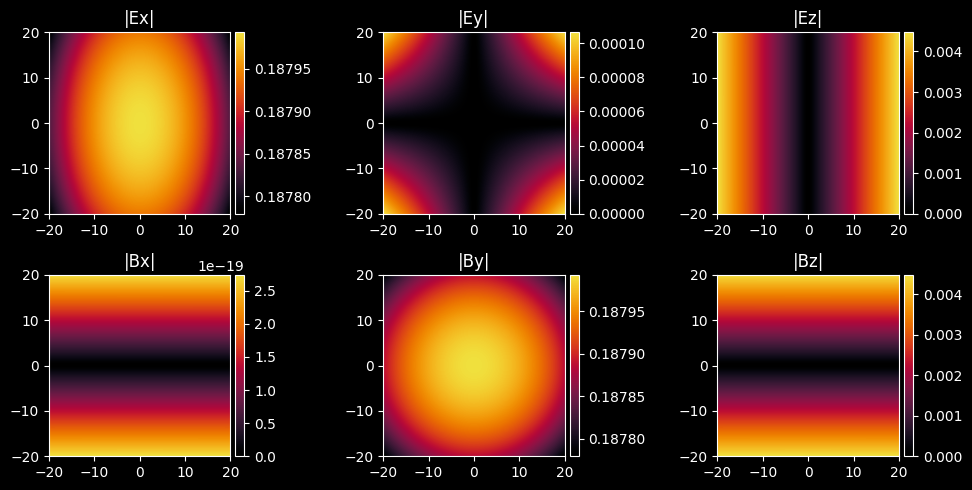

In [253]:
field_names = ['|Ex|','|Ey|','|Ez|','|Bx|','|By|','|Bz|']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
for i in range(6):
    ax = axes[i//3, i%3]
    iplot = ax.imshow(np.abs(field[i]),
            cmap=cm.ember,
            extent=[xmin, xmax, ymin, ymax], 
            origin='lower')
    ax.set_title(field_names[i])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(iplot, cax=cax)
plt.tight_layout()
plt.show()

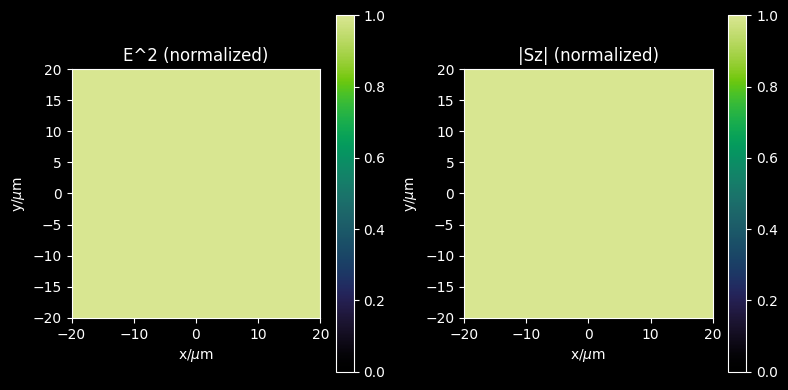

In [254]:
e_density = np.abs(field[0]**2 + field[1]**2 + field[2]**2)
vmin, vmax = 0, np.max(e_density)
e_density = e_density/vmax

pointz = np.abs(field[0]*field[4] - field[1]*field[3])
vmin, vmax = 0, np.max(pointz)
pointz = pointz/vmax

fig, axes = plt.subplots(ncols=2, figsize=(8,4))
ims0 = axes[0].imshow(e_density,
        cmap=cm.toxic,
        extent=[xmin, xmax, ymin, ymax],
        vmin=vmin,
        vmax=1,
        origin='lower')
axes[0].set_xlabel('x/$\mu$m')
axes[0].set_ylabel('y/$\mu$m')
axes[0].set_title('E^2 (normalized)')
plt.colorbar(ims0, ax=axes[0])
ims1 = axes[1].imshow(pointz,
        cmap=cm.toxic,
        extent=[xmin, xmax, ymin, ymax],
        vmin=vmin,
        vmax=1,
        origin='lower')
axes[1].set_xlabel('x/$\mu$m')
axes[1].set_ylabel('y/$\mu$m')
axes[1].set_title('|Sz| (normalized)')
plt.colorbar(ims0, ax=axes[1])
plt.tight_layout()
plt.show()

## ##Make a field, simulate propagation, compare to exact

In [338]:
xmin, xmax = -5, 5
ymin, ymax = -5  , 5
simulation_resolution = 0.1
wavelength = 0.5
sampling_resolution = simulation_resolution / 2
num_elements_x      = int((xmax - xmin)/sampling_resolution + 1)
num_elements_y      = int((ymax - ymin)/sampling_resolution + 1)
x = np.linspace(xmin, xmax, num_elements_x)
y = np.linspace(ymin, ymax, num_elements_y)
xg, yg = np.meshgrid(x, y)
xd, yd, zd = 0, 0, -100
omega = 2*np.pi/wavelength
theta, phi = np.pi/2, 0
z = 0
field  = rs.dipole_field(xg, yg, z, xd, yd, zd, theta, phi, omega)
# export to use as input fields
field_names = ['Ex','Ey','Ez','Bx','By','Bz']
for idx, field_name in enumerate(field_names):
    afield = field[idx]
    fname = 'D:/Zia_Lab/Codebase/rspie/dipf_{}.dat'.format(field_name.lower())
    rs.save_2D_array_to_dat(fname, 
                        afield, wavelength, xmin, xmax, ymin, ymax)

In [83]:
# run simulation

In [343]:
fname = 'D:/Zia_Lab/Codebase/rspie/out_m2_f2_ex.dat'
dip_field_out = rs.load_2d_dat(fname)[3]

In [344]:
z = 5
ofield  = rs.dipole_field(xg, yg, z, xd, yd, zd, theta, phi, omega)

In [345]:
dip_field_out.shape

(201, 201)

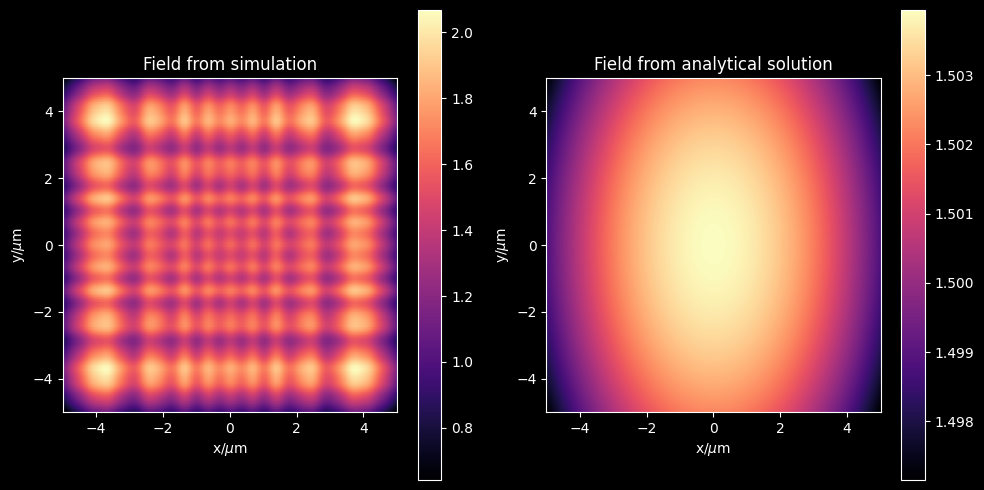

In [350]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
ims0 = axes[0].imshow(np.abs(dip_field_out), 
    cmap='magma',
    origin='lower',
    extent= [xmin, xmax, ymin, ymax])
axes[0].set_title('Field from simulation')
plt.colorbar(ims0, ax=axes[0])
ims1 = axes[1].imshow(np.abs(ofield[0]), 
    cmap='magma',
    origin='lower',
    extent= [xmin, xmax, ymin, ymax])
axes[1].set_title('Field from analytical solution')
plt.colorbar(ims1, ax=axes[1])
for ax in axes:
    ax.set_xlabel('x/$\mu$m')
    ax.set_ylabel('y/$\mu$m')
plt.tight_layout()
plt.show()

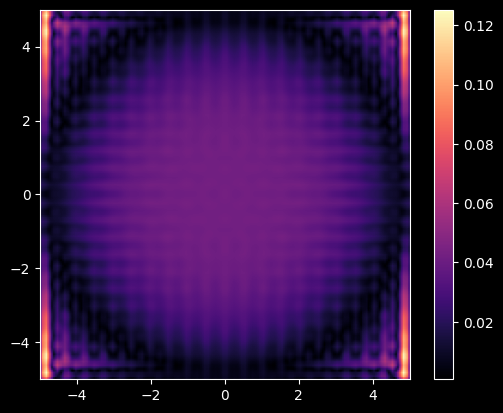

In [109]:
plt.figure()
plt.imshow(dip_field_out, 
    cmap='magma',
    origin='lower',
    extent= [xmin, xmax, ymin, ymax])
plt.colorbar()
plt.show()

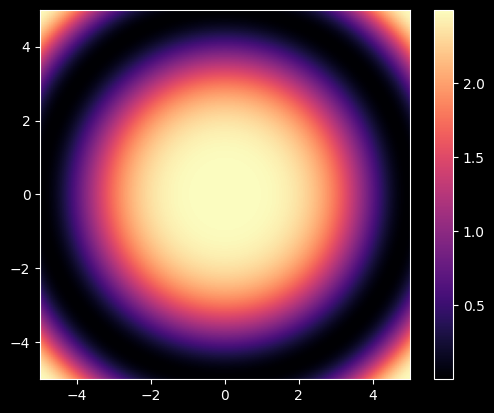

In [112]:
plt.figure()
plt.imshow(np.abs(ofield[0]**2+ofield[1]**2), 
    cmap='magma',
    origin='lower',
    extent= [xmin, xmax, ymin, ymax])
plt.colorbar()
plt.show()